# 1. Loan Data EDA
Burada **loan_data** veri setinin keşifsel veri analizini gerçekleştirelim ve veri setimizi daha yakından tanıyalım.



## 1.1.Gerekli Kütüphanelerin Yüklenmesi

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
import sys
import os
sys.path.append(os.path.abspath('../src'))

from data_loader import load_loan_data


loan_df = load_loan_data(save_to_disk=False) 


Loan dataset indirildi.Ilk bes sutunu gosteriliyor...
  Loan_ID loan_status  Principal  terms effective_date    due_date  \
0      L1     PAIDOFF       1000      7     2021-01-01  2021-01-08   
1      L2     PAIDOFF       1500     15     2021-01-02  2021-01-09   
2      L3     PAIDOFF       2000     30     2021-01-03  2021-01-10   
3      L4     PAIDOFF       2500      7     2021-01-04  2021-01-11   
4      L5     PAIDOFF       3000     15     2021-01-05  2021-01-12   

  paid_off_time  past_due_days  age             education  Gender  
0           NaN              0   20  High School or Below    male  
1    2021-01-11              0   21               college  female  
2    2021-01-12              0   22              Bechalor    male  
3    2021-01-13              0   23       Master or Above  female  
4    2021-01-14              0   24  High School or Below    male  
Loan dataset indirildi.Ilk bes sutunu gosteriliyor...
  Loan_ID loan_status  Principal  terms effective_date    due_d

## 1.2. Gerekli loan_dataset'inin Yüklenmesi

In [ ]:
# Veri setini yukleyelim
loan_df = load_loan_data(save_to_disk=False)

print("\nSon 5 Satir:\n")
loan_df.tail()


Loan dataset indirildi.Ilk bes sutunu gosteriliyor...
  Loan_ID loan_status  Principal  terms effective_date    due_date  \
0      L1     PAIDOFF       1000      7     2021-01-01  2021-01-08   
1      L2     PAIDOFF       1500     15     2021-01-02  2021-01-09   
2      L3     PAIDOFF       2000     30     2021-01-03  2021-01-10   
3      L4     PAIDOFF       2500      7     2021-01-04  2021-01-11   
4      L5     PAIDOFF       3000     15     2021-01-05  2021-01-12   

  paid_off_time  past_due_days  age             education  Gender  
0           NaN              0   20  High School or Below    male  
1    2021-01-11              0   21               college  female  
2    2021-01-12              0   22              Bechalor    male  
3    2021-01-13              0   23       Master or Above  female  
4    2021-01-14              0   24  High School or Below    male  

Son 5 Satir:



,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
495,L496,COLLECTION,1000,7,2022-05-11,2022-05-18,NaN,5,35,Master or Above,female
496,L497,COLLECTION,1500,15,2022-05-12,2022-05-19,2021-01-16,0,36,High School or Below,male
497,L498,COLLECTION,2000,30,2022-05-13,2022-05-20,2021-01-17,0,37,college,female
498,L499,COLLECTION,2500,7,2022-05-14,2022-05-21,2021-01-18,0,38,Bechalor,male
499,L500,COLLECTION,3000,15,2022-05-15,2022-05-22,2021-01-19,0,39,Master or Above,female


## 1.3. Sütun İsimlerinin ve Veri Tiplerinin Öğrenilmesi

In [48]:
# Veri tiplerini ve sutunlarini ogren
loan_columns = loan_df.columns
# print("Veri Setinin Sutunlari:\n", loan_columns)

# Veri tiplerini ogrenmek icin list comprehension kullanabiliriz.
# [f"{col} sutunun veri tipi: {loan_df[col].dtypes}" for col in loan_df.columns]

# Daha iyi gormek icin sutuna id atayalim
for idx, col in enumerate(loan_columns):
    print(f"{idx}. Sutun: {col}, Veri Tipi: {loan_df[col].dtype}")

0. Sutun: Loan_ID, Veri Tipi: object
1. Sutun: loan_status, Veri Tipi: object
2. Sutun: Principal, Veri Tipi: int64
3. Sutun: terms, Veri Tipi: int64
4. Sutun: effective_date, Veri Tipi: object
5. Sutun: due_date, Veri Tipi: object
6. Sutun: paid_off_time, Veri Tipi: object
7. Sutun: past_due_days, Veri Tipi: int64
8. Sutun: age, Veri Tipi: int64
9. Sutun: education, Veri Tipi: object
10. Sutun: Gender, Veri Tipi: object


## 1.4. Grab Col Names Fonksiyonu ile Gerçek Veri Tiplerinin Öğrenilmesi

In [12]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    """Veri setindeki kategorik, numerik ve kategorik fakat kardinal degiskenlerin isimlerini verir."""
    df = dataframe.copy()
    # kategorik sutunlar
    cat_cols = [col for col in df.columns if df[col].dtypes == 'object']
    
    # numerik fakat kategorik olan sutunlar
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and
                   df[col].dtypes != 'object']
    
    # kategorik fakat kardinal olan sutunlar.Bunlarin faydasi genellikle azdir ve modelden cikarilabilir.
    cat_but_car = [col for col in df.columns if df[col].dtypes == 'object' and
                   df[col].nunique() > car_th]
    
    
    # kategorik sutunlarin son hali
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    cat_cols = cat_cols + num_but_cat
    
    num_cols = [col for col in df.columns if df[col].dtypes in ['float64', 'int64'] and 
                col not in num_but_cat]
    
    return cat_cols, num_cols, cat_but_car
  

## 1.5. Kategorik Sütunların Gösterilmesi

In [19]:
cat_cols, num_cols, cat_but_car = grab_col_names(loan_df)
print(f"************************************Kategorik Sutunlar********************************************\n {cat_cols}")

************************************Kategorik Sutunlar********************************************
 ['loan_status', 'paid_off_time', 'education', 'Gender', 'Principal', 'terms', 'past_due_days']


## 1.6. Sayısal (Nümerik) Sütunların Gösterilmesi

In [ ]:
print(f"*** Numerik Sutunlar ***\n",num_cols)

*** Numerik Sutunlar ***
 ['age']


## 1.7. Kardinal Sütunların Gösterilmesi

In [30]:
print("************ Kardinal Sutunlar ************\n",cat_but_car)

************ Kardinal Sutunlar ************
 ['Loan_ID', 'effective_date', 'due_date']


## 1.8. Describe() Metodu ile Sayısal Sütun İstatistiklerinin Gösterilmesi

In [31]:
# describe () metodu ile numerik degiskenlerin betimsel istatistiklerini ogren
loan_df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,500.0,39.1,11.548018,20.0,29.0,39.0,49.0,59.0


## 1.9. Describe() Metodu ile Kategorik Sütunların İstatistiklerinin Gösterilmesi

In [32]:
loan_df.describe(include = "object").T 

,count,unique,top,freq
Loan_ID,500,500,L1,1
loan_status,500,2,PAIDOFF,300
effective_date,500,500,2021-01-01,1
due_date,500,500,2021-01-08,1
paid_off_time,400,8,2021-01-11,50
education,500,4,High School or Below,125
Gender,500,2,male,250


## 1.9. Eksik Değerlerin Sayısının Gösterilmesi

In [51]:
# Bos veri var mi
total_null_values = loan_df.isnull().sum().sum() 
print(total_null_values)

100


In [52]:
for col in loan_df.columns:
    if loan_df[col].isnull().sum() > 0:
        print(f"{col} sutununda {loan_df[col].isnull().sum()} adet eksik deger var.")

paid_off_time sutununda 100 adet eksik deger var.


## 1.10. Info Metodu ile Veri Seti Hakkında Genel Bilgi

In [34]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Loan_ID         500 non-null    object
 1   loan_status     500 non-null    object
 2   Principal       500 non-null    int64 
 3   terms           500 non-null    int64 
 4   effective_date  500 non-null    object
 5   due_date        500 non-null    object
 6   paid_off_time   400 non-null    object
 7   past_due_days   500 non-null    int64 
 8   age             500 non-null    int64 
 9   education       500 non-null    object
 10  Gender          500 non-null    object
dtypes: int64(4), object(7)
memory usage: 43.1+ KB


## 1.11. Bazı Sütunların Value Counts Methodu ile Dağılımının Gösterilmesi

In [35]:
for col in cat_cols:
    print(f"{col} sutununun deger sayisi:\n {loan_df[col].value_counts()}\n")

loan_status sutununun deger sayisi:
 loan_status
PAIDOFF       300
COLLECTION    200
Name: count, dtype: int64

paid_off_time sutununun deger sayisi:
 paid_off_time
2021-01-11    50
2021-01-12    50
2021-01-13    50
2021-01-14    50
2021-01-16    50
2021-01-17    50
2021-01-18    50
2021-01-19    50
Name: count, dtype: int64

education sutununun deger sayisi:
 education
High School or Below    125
college                 125
Bechalor                125
Master or Above         125
Name: count, dtype: int64

Gender sutununun deger sayisi:
 Gender
male      250
female    250
Name: count, dtype: int64

Principal sutununun deger sayisi:
 Principal
1000    100
1500    100
2000    100
2500    100
3000    100
Name: count, dtype: int64

terms sutununun deger sayisi:
 terms
7     167
15    167
30    166
Name: count, dtype: int64

past_due_days sutununun deger sayisi:
 past_due_days
0    450
5     50
Name: count, dtype: int64



In [ ]:
loan_df['loan_status'].value_counts()


loan_status
PAIDOFF       300
COLLECTION    200
Name: count, dtype: int64

## 1.12. Show Cat Cols ile Kategorik Sütunların Görselleştirilmesi:

LOAN_STATUS Sutununun Deger Sayisi:
 loan_status
PAIDOFF       300
COLLECTION    200
Name: count, dtype: int64



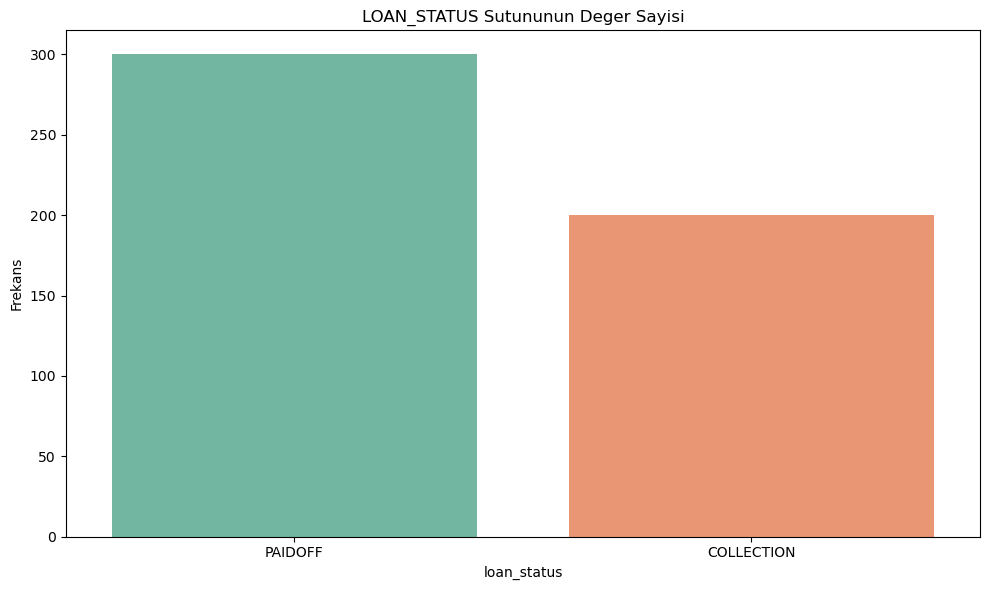

PAID_OFF_TIME Sutununun Deger Sayisi:
 paid_off_time
2021-01-11    50
2021-01-12    50
2021-01-13    50
2021-01-14    50
2021-01-16    50
2021-01-17    50
2021-01-18    50
2021-01-19    50
Name: count, dtype: int64



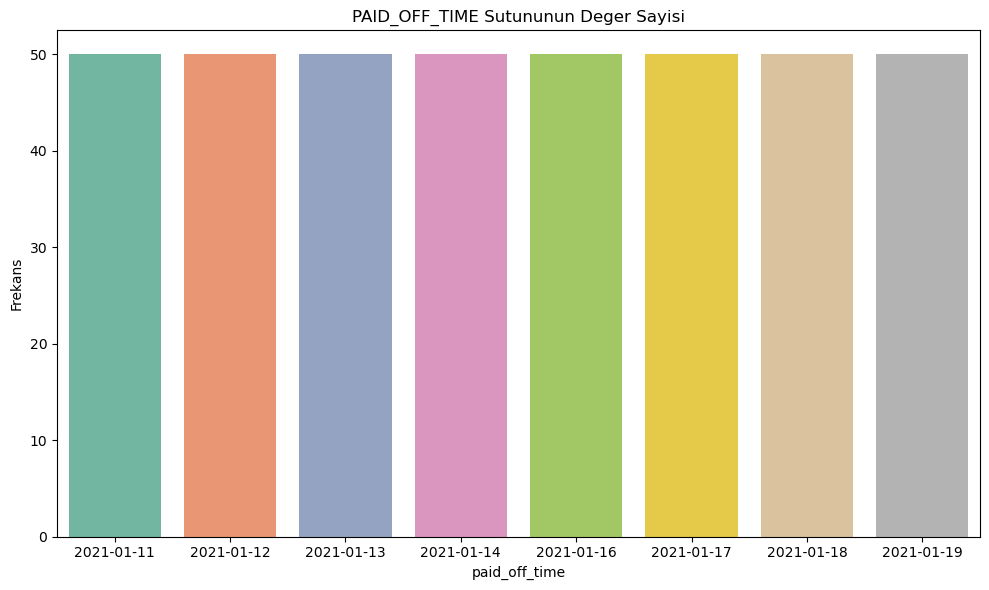

EDUCATION Sutununun Deger Sayisi:
 education
High School or Below    125
college                 125
Bechalor                125
Master or Above         125
Name: count, dtype: int64



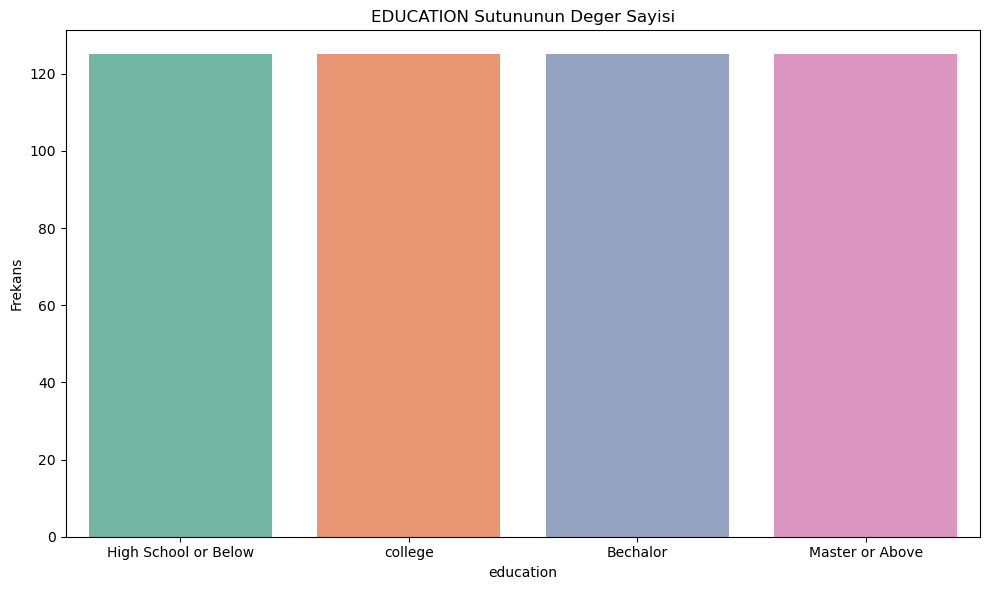

GENDER Sutununun Deger Sayisi:
 Gender
male      250
female    250
Name: count, dtype: int64



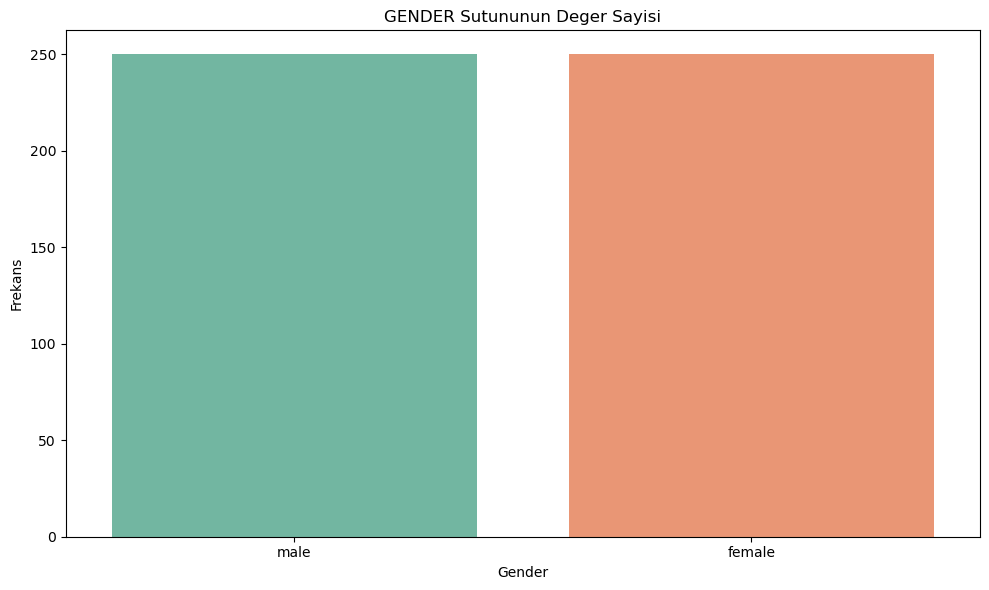

PRINCIPAL Sutununun Deger Sayisi:
 Principal
1000    100
1500    100
2000    100
2500    100
3000    100
Name: count, dtype: int64



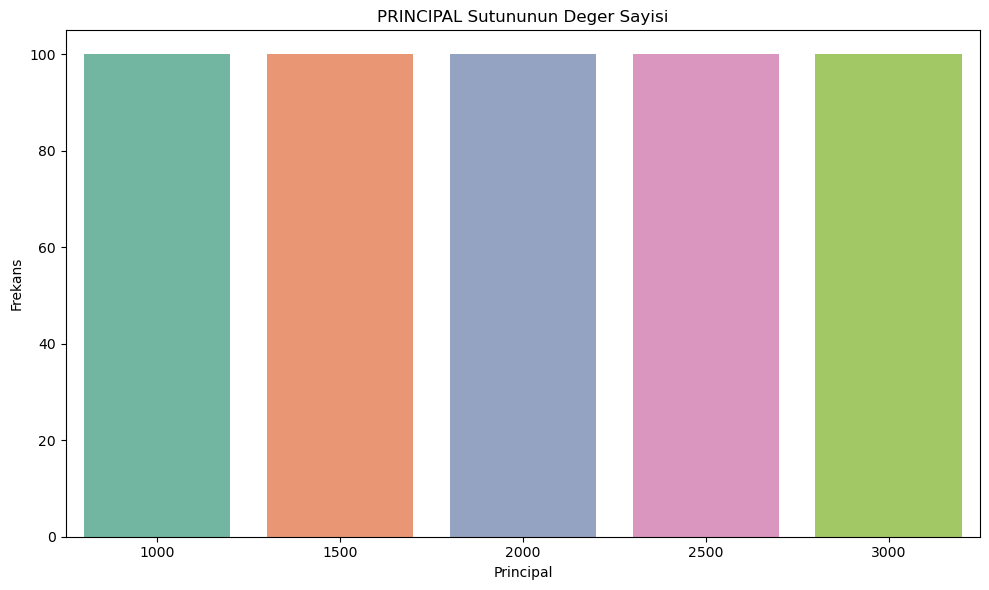

TERMS Sutununun Deger Sayisi:
 terms
7     167
15    167
30    166
Name: count, dtype: int64



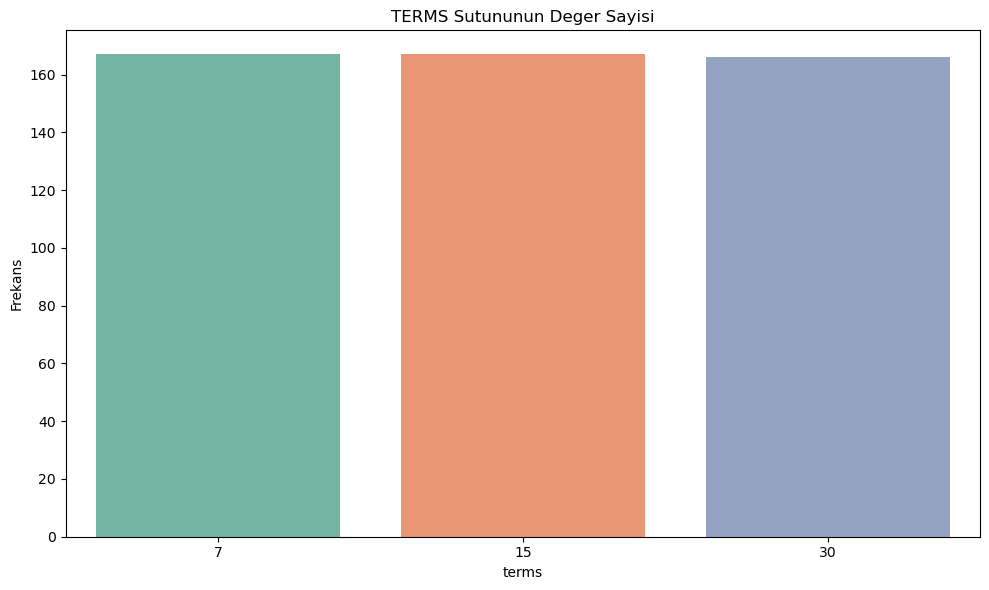

PAST_DUE_DAYS Sutununun Deger Sayisi:
 past_due_days
0    450
5     50
Name: count, dtype: int64



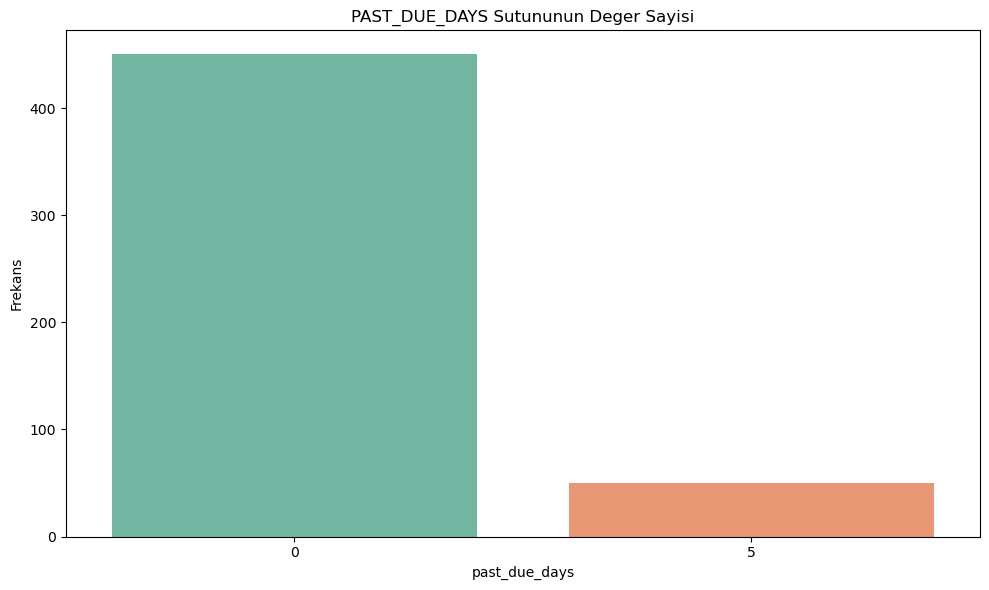

In [ ]:
def show_cat_cols(dataframe, cat_cols, plot = False):
    df = dataframe.copy()
    for col in cat_cols:
        print(f"{col.upper()} Sutununun Deger Sayisi:\n {df[col].value_counts()}\n")
        if plot:
            plt.figure(figsize = (10, 6))
            sns.countplot(x = df[col], data = df, palette="Set2")
            plt.title(f"{col.upper()} Sutununun Deger Sayisi")
            plt.xlabel(col)
            plt.ylabel("Frekans")
            plt.tight_layout()
            plt.show()
        else:
            print("Lutfen plot parametresini True yapiniz.")

show_cat_cols(loan_df, cat_cols, plot = True)

## 1.13. Show Num Cols ile Sayısal Sütunların Görselleştirilmesi

AGE Sutununun Betimsel Istatistikleri:
 count    500.000000
mean      39.100000
std       11.548018
min       20.000000
25%       29.000000
50%       39.000000
75%       49.000000
max       59.000000
Name: age, dtype: float64



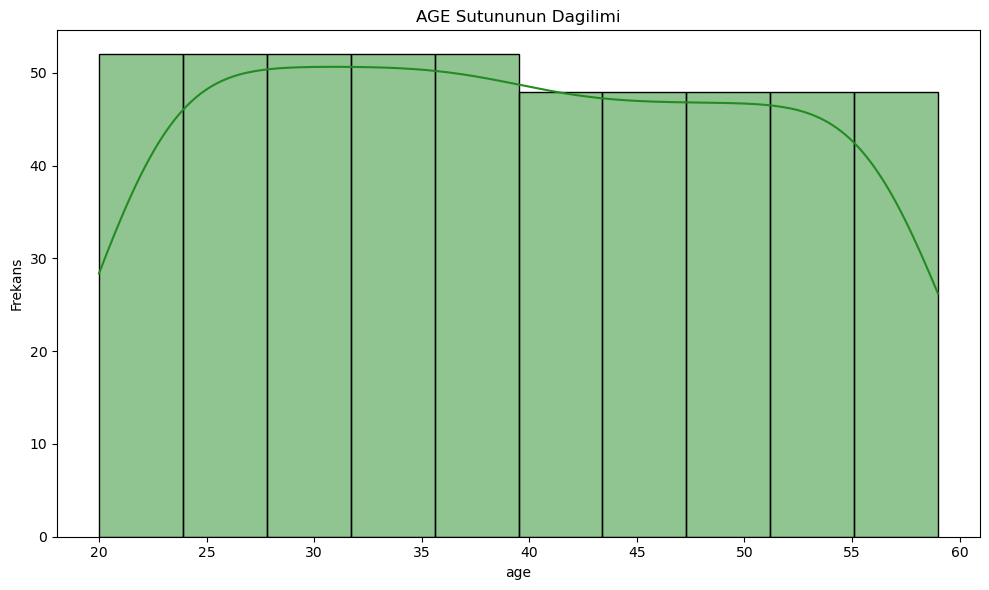

In [43]:
def show_num_cols(dataframe, num_cols, plot = False):
    df = dataframe.copy()
    for col in num_cols:
        print(f"{col.upper()} Sutununun Betimsel Istatistikleri:\n {df[col].describe().T}\n")
        if plot:
            plt.figure(figsize = (10, 6))
            sns.histplot(x = df[col], data = df, kde = True, color = 'forestgreen')
            plt.title(f"{col.upper()} Sutununun Dagilimi")
            plt.xlabel(col)
            plt.ylabel("Frekans")
            plt.tight_layout()
            plt.show()
        else:
            print("Lutfen plot parametresini True yapiniz.")

show_num_cols(loan_df, num_cols, plot = True)

## 1.14. Check Outlier Fonksiyonu ile Aykırı Değer Tespiti

In [46]:
def check_outlier(dataframe, num_cols, q1 = 0.25, q3 = 0.75, plot = False):
    df = dataframe.copy()
    outlier_dict = {}
    for col in num_cols:
        Q1 = df[col].quantile(q1)
        Q3 = df[col].quantile(q3)
        IQR = Q3 - Q1
        low_limit = Q1 - 1.5 * IQR
        up_limit = Q3 + 1.5 * IQR
        if df[(df[col] < low_limit) | (df[col] > up_limit)].any(axis=None):
            outlier_dict[col] = True # aykiri deger var
        else:
            outlier_dict[col] = False # herhangi bir aykiri deger yok
    
    # Bunu gorsellestirelim. En iyi yontem kutu grafigi olacaktir.
    if plot:
        for col in num_cols:
            plt.figure(figsize = (10, 6))
            sns.boxplot(x = df[col], data = df, color = 'lightblue')
            plt.title(f"{col.upper()} Sutununun Boxplot Grafiği")
            plt.xlabel(col)
            plt.tight_layout()
            plt.show()
    return outlier_dict

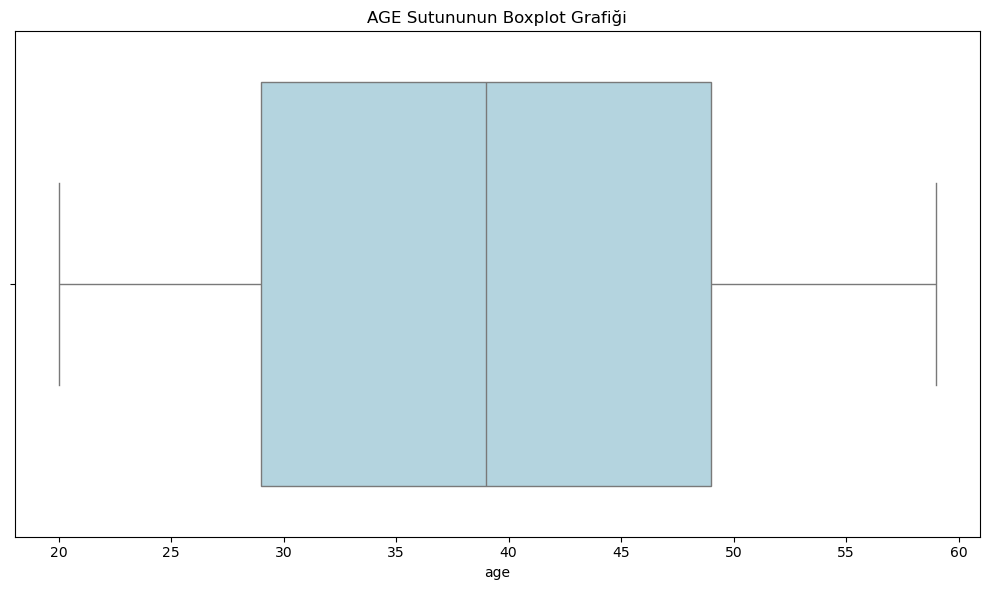

{'age': False}

In [45]:
check_outlier(loan_df, num_cols, plot = True)